In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import json

import torch
from dataset.loader import DatasetLoader
from tokenizer import ByteLevelBPE

import sys
sys.path.append("..")
import config

import matplotlib.pyplot as plt

import importlib

/home/nad/studies/Transformer-Image-Captioning-IIW/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_size = config.BATCH_SIZE_TRAIN

# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

random.seed(42)

importlib.reload(config)

<module 'config' from '/home/nad/studies/Transformer-Image-Captioning-IIW/config.py'>

In [3]:
data_loader = DatasetLoader(dataset_type=config.DATASET, batch_size_train=1, batch_size_test=1, shuffle_test=True)
data_loader.load_data()

train_dataloader = data_loader.get_train_dataloader()
test_dataloader = data_loader.get_test_dataloader()

Loading COCO dataset...


/tmp/ipykernel_1203146/3186784317.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  plt.imshow(np.array(train_sample['pixel_values'].squeeze().permute(1, 2, 0)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


{'pixel_values': tensor([[[[ 0.4508,  1.2557,  1.3927,  ..., -2.0837, -2.1008, -2.1008],
          [ 0.3138,  1.1700,  1.3413,  ..., -2.0837, -2.0837, -2.0837],
          [ 0.1768,  1.0673,  1.3413,  ..., -2.0323, -2.0665, -2.0837],
          ...,
          [ 0.3138,  0.2624,  0.3481,  ...,  0.2111,  0.2111,  0.1426],
          [ 0.3823,  0.4337,  0.4166,  ...,  0.3309,  0.2967,  0.2111],
          [ 0.2796,  0.2453,  0.3309,  ...,  0.3481,  0.3309,  0.2967]],

         [[ 1.1681,  1.8683,  1.9909,  ..., -1.9832, -2.0007, -2.0182],
          [ 1.0280,  1.8158,  1.9734,  ..., -2.0007, -2.0182, -2.0007],
          [ 0.8354,  1.6933,  1.9209,  ..., -1.7906, -1.8606, -1.9482],
          ...,
          [ 0.7829,  0.6954,  0.8004,  ...,  0.7129,  0.7129,  0.7129],
          [ 0.9405,  0.9930,  0.8880,  ...,  0.8529,  0.8004,  0.7479],
          [ 0.8004,  0.7829,  0.8004,  ...,  0.9055,  0.8880,  0.8004]],

         [[ 1.5768,  2.3437,  2.5006,  ..., -1.6999, -1.7696, -1.7696],
          [ 1

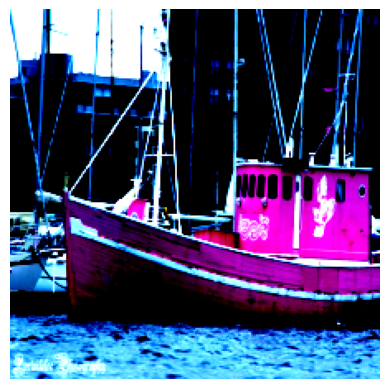

/tmp/ipykernel_1203146/3186784317.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  plt.imshow(np.array(test_sample['pixel_values'].squeeze().permute(1, 2, 0)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5702832].


Description:
 ['A pink boat at a dock with brick buildings in the background.']


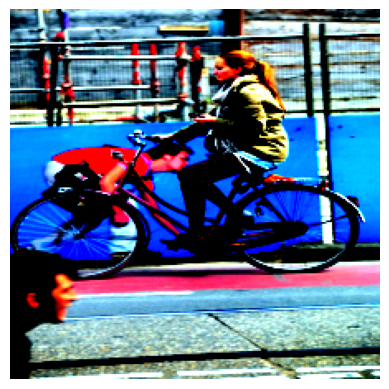

Description:
 ['A woman riding a biek down a sidewalk.']


In [4]:
train_sample = next(iter(train_dataloader))
print(train_sample)
plt.imshow(np.array(train_sample['pixel_values'].squeeze().permute(1, 2, 0)))
plt.axis('off')
plt.show()
print('Description:\n', train_sample['description'])

test_sample = next(iter(test_dataloader))
plt.imshow(np.array(test_sample['pixel_values'].squeeze().permute(1, 2, 0)))
plt.axis('off')
plt.show()
print('Description:\n', test_sample['description'])

In [ ]:
lengths = []
descriptions = []

for sample in train_dataloader:
    desc = sample['description'][0]
    lengths.append(len(desc))
    descriptions.append(desc)

for sample in test_dataloader:
    desc = sample['description'][0]
    lengths.append(len(desc))
    descriptions.append(desc)

In [ ]:
# Decide on vocab size based on count of unique words in the dataset
print(set(" ".join(descriptions).split()))
count_unique_words = len(set(" ".join(descriptions).split()))
print(f"Count of unique words in the dataset: {count_unique_words}")

file_path = os.path.join(config.TOKENIZER_DATA_PATH, 'count_unique_words_{}_{}.json'.format(config.TOKENIZER_FILENAME_PREFIX, config.DATASET))
with open(file_path, 'w') as f:
    json.dump({'count_unique_words': count_unique_words}, f)

{'PERFORM', 'markers', 'Crust', 'docked', 'fuel', 'crowd.', 'VW', 'leftovers', 'pita', 'straddling', 'Yellow', 'zebra-print', 'TWO', 'laptops.', 'thermometer.', 'groom', 'BLACK', 'green', 'bullhorn.', 'driving', 'boxes.', 'TV.', 'baskets', 'bench', 'DUMM', 'foamy', 'platform', 'slings.', 'tidy', 'stove', 'shoes', 'forward', 'Passengers', 'shawl', 'yacht', 'trash', 'spoons', 'hydrant', 'animals.', 'sailboats', 'sidewalk', 'squashing', 'headphones', 'beneficial.', 'sittin', 'in.', 'eaten.', 'office', 'scenic', 'Airport', 'oval', 'modern', 'lobby.', 'booth', 'Lots', 'stretches', 'bananas', 'upstairs', 'illuminated,', 'raw', 'amongst', 'brownie', 'ascending', 'mp3', 'vintage', 'Photography', 'ground,', 'sumo', 'CHAIR.', 'view.', 'broadway', 'gives', 'york', 'puts', 'widely', 'Passenger', 'end', 'soup.', 'fountain', 'bacon', 'fun.', 'topless', 'grumpy', 'tired', 'Airplane', 'freshener.', 'smoke.', 'tip', 'donut.', "farmer's", 'pads', 'ocean.', 'ball.', 'kayak', 'put', 'feed', 'mount', 'Trum

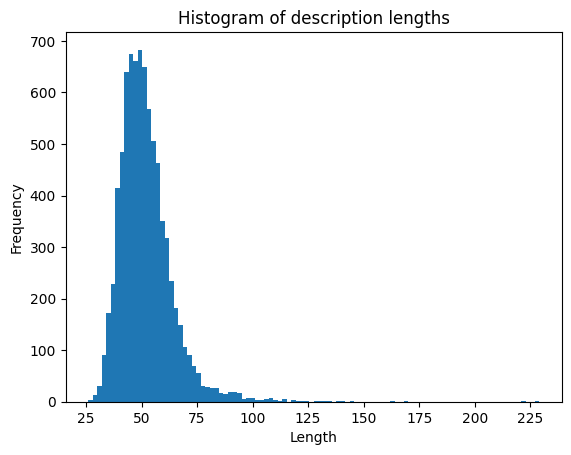

Length mean:  52.190493827160495
Length median:  50.0
Length std:  12.114785721979075
Length max (90th percentile):  66
Length max (92nd percentile):  68
Length max (95th percentile):  72
Length max (99th percentile):  93


In [7]:
plt.hist(lengths, bins=100)
plt.title("Histogram of description lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

mean = np.mean(lengths)
median = np.median(lengths)
std = np.std(lengths)
max_length_90 = int(np.percentile(lengths, 90))
max_length_92 = int(np.percentile(lengths, 92))
max_length_95 = int(np.percentile(lengths, 95))
max_length_99 = int(np.percentile(lengths, 99))
print('Length mean: ', mean)
print('Length median: ', median)
print('Length std: ', std)
print('Length max (90th percentile): ', max_length_90)
print('Length max (92nd percentile): ', max_length_92)
print('Length max (95th percentile): ', max_length_95)
print('Length max (99th percentile): ', max_length_99)

In [8]:
with open(os.path.join(config.TOKENIZER_DATA_PATH, "description_stats_{}.json".format(config.DATASET)), "w") as f:
    json.dump({
        "mean": round(mean),
        "median": round(median),
        "std": round(std),
        "max_90": max_length_90,
        "max_92": max_length_92,
        "max_95": max_length_95,
        "max_99": max_length_99
    }, f)

In [9]:
special_tokens = [config.SpecialTokens.PAD, config.SpecialTokens.BOS, config.SpecialTokens.EOS]
bpe_tokenizer = ByteLevelBPE(special_tokens=special_tokens)

bpe_tokenizer.train(descriptions, vocab_size=config.TOKENIZER_TRAIN_VOCAB_SIZE, verbose=True)
print(bpe_tokenizer)
bpe_tokenizer.save(folder=config.TOKENIZER_DATA_PATH, filename_prefix=config.TOKENIZER_FILENAME_PREFIX)

special_tokens_dict: {<SpecialTokens.PAD: '<pad>'>: 0, <SpecialTokens.BOS: '<bos>'>: 1, <SpecialTokens.EOS: '<eos>'>: 2}


Vocab size (with special tokens): 4986
Made 4727 merges
ByteLevelBPE(vocab_size=4986)


In [10]:
max_desc_length_tokens = data_loader.get_max_description_length_in_tokens(tokenizer=bpe_tokenizer, descriptions=descriptions, max_sequence_length=-1)

KeyboardInterrupt: 

In [ ]:
# export json for setting MAX_DESC_LENGTH=max_desc_length in config later
with open(os.path.join(config.TOKENIZER_DATA_PATH, "max_desc_length_{}.json".format(config.DATASET)), "w") as f:
    json.dump({"MAX_DESC_LENGTH": max_desc_length_tokens}, f)

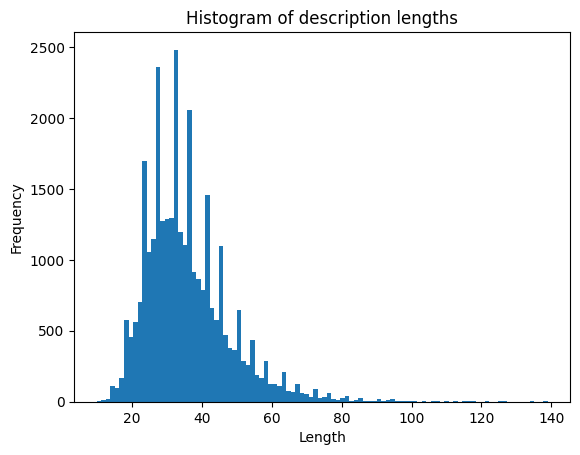

Length mean:  35.99203585477526
Length median:  34.0
Length std:  12.410625912783265
Length max (90th percentile):  52
Length max (92nd percentile):  54
Length max (95th percentile):  59
Length max (99th percentile):  77


In [ ]:
token_lengths = []
for desc in descriptions:
    encoded = bpe_tokenizer.encode(desc, max_seq_length=-1, verbose=False)
    token_lengths.append(len(encoded))

plt.hist(token_lengths, bins=100)
plt.title("Histogram of description lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

mean = np.mean(token_lengths)
median = np.median(token_lengths)
std = np.std(token_lengths)
max_length_90 = int(np.percentile(token_lengths, 90))
max_length_92 = int(np.percentile(token_lengths, 92))
max_length_95 = int(np.percentile(token_lengths, 95))
max_length_99 = int(np.percentile(token_lengths, 99))
print('Length mean: ', mean)
print('Length median: ', median)
print('Length std: ', std)
print('Length max (90th percentile): ', max_length_90)
print('Length max (92nd percentile): ', max_length_92)
print('Length max (95th percentile): ', max_length_95)
print('Length max (99th percentile): ', max_length_99)

In [ ]:
with open(os.path.join(config.TOKENIZER_DATA_PATH, "description_token_stats_{}.json".format(config.DATASET)), "w") as f:
    json.dump({
        "mean": round(mean),
        "median": round(median),
        "std": round(std),
        "max_90": max_length_90,
        "max_92": max_length_92,
        "max_95": max_length_95,
        "max_99": max_length_99
    }, f)

In [ ]:
bpe_tokenizer.load(folder=config.TOKENIZER_DATA_PATH, filename_prefix=config.TOKENIZER_FILENAME_PREFIX)

samples = 10

for batch in train_dataloader:
    if samples < 0:
        break
    desc_batch = batch['description']
    for desc in desc_batch:
        print('Description: ', desc)
        print('Tokenized: ', bpe_tokenizer.tokenize(desc))
        encoded = bpe_tokenizer.encode(desc, max_seq_length=len(bpe_tokenizer.tokenize(desc))+2, verbose=True)
        print(f'Encoded: {encoded}')
        decoded = bpe_tokenizer.decode(encoded)
        print(f'Decoded: {decoded}\n')
        decoded_stripped = bpe_tokenizer.strip(decoded)
        # cut desc to be the same length as decoded_stripped
        desc_cut = desc[:len(decoded_stripped)]
        assert desc_cut == decoded_stripped, "Decoded text does not match original!"
    samples -= 1

Description:  A seated young woman in a hat is reading at a coffee shop.
Tokenized:  ['A', 'Ġs', 'e', 'at', 'ed', 'Ġyoung', 'Ġwoman', 'Ġin', 'Ġa', 'Ġh', 'at', 'Ġis', 'Ġ', 're', 'ad', 'ing', 'Ġa', 't', 'Ġa', 'Ġco', 'ff', 'ee', 'Ġsh', 'op', '.']
Encoded: [1, 68, 262, 104, 296, 307, 372, 324, 270, 259, 282, 296, 297, 35, 269, 496, 264, 259, 119, 259, 362, 613, 785, 353, 331, 49, 2]
Decoded: <bos>A seated young woman in a hat is reading at a coffee shop.<eos>

Description:  A guy is sitting by a tree watching a girl sing with a blue bucket in front of her.
Tokenized:  ['A', 'Ġguy', 'Ġis', 'Ġsitting', 'Ġby', 'Ġa', 'Ġtree', 'Ġwatch', 'ing', 'Ġa', 'Ġgirl', 'Ġsing', 'Ġwith', 'Ġa', 'Ġblue', 'Ġbu', 'ck', 'et', 'Ġin', 'Ġfro', 'n', 't', 'Ġof', 'Ġher', '.']
Encoded: [1, 68, 705, 297, 392, 432, 259, 692, 584, 264, 259, 382, 1427, 291, 259, 343, 448, 290, 310, 270, 1970, 113, 119, 292, 388, 49, 2]
Decoded: <bos>A guy is sitting by a tree watching a girl sing with a blue bucket in front of her.<eos>

